# 01. PyTorch Workflow Fundamentals

In this module we're going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).
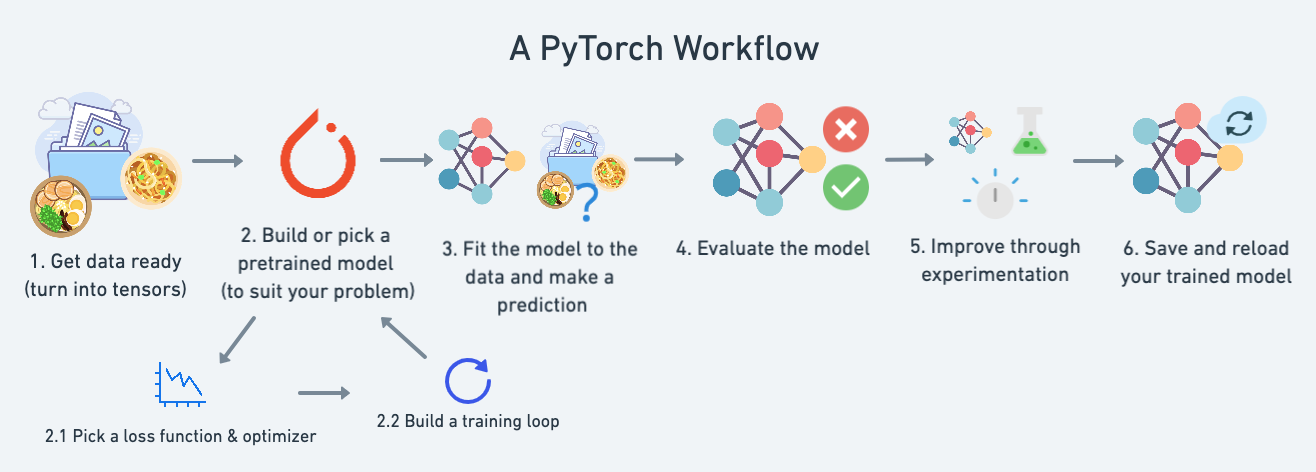

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.
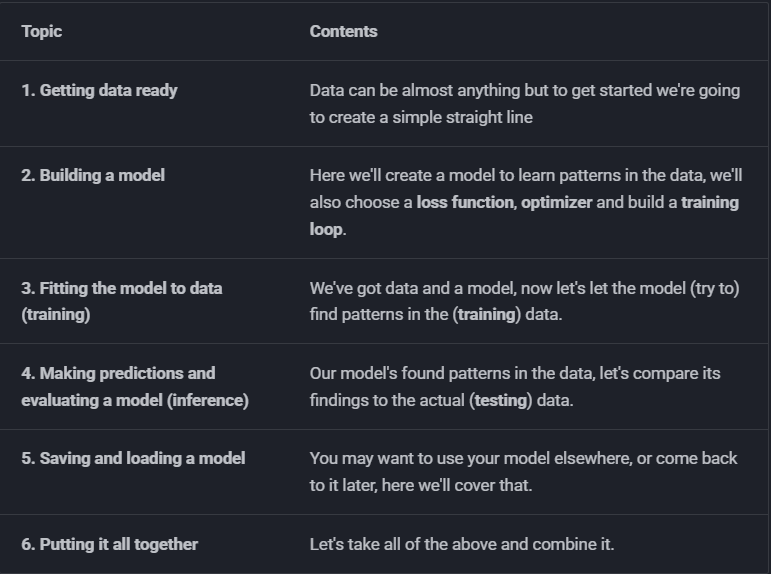

We're going to get `torch`, `torch.nn` (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.0+cu126'

## 1. Data (preparing and loading)
I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.
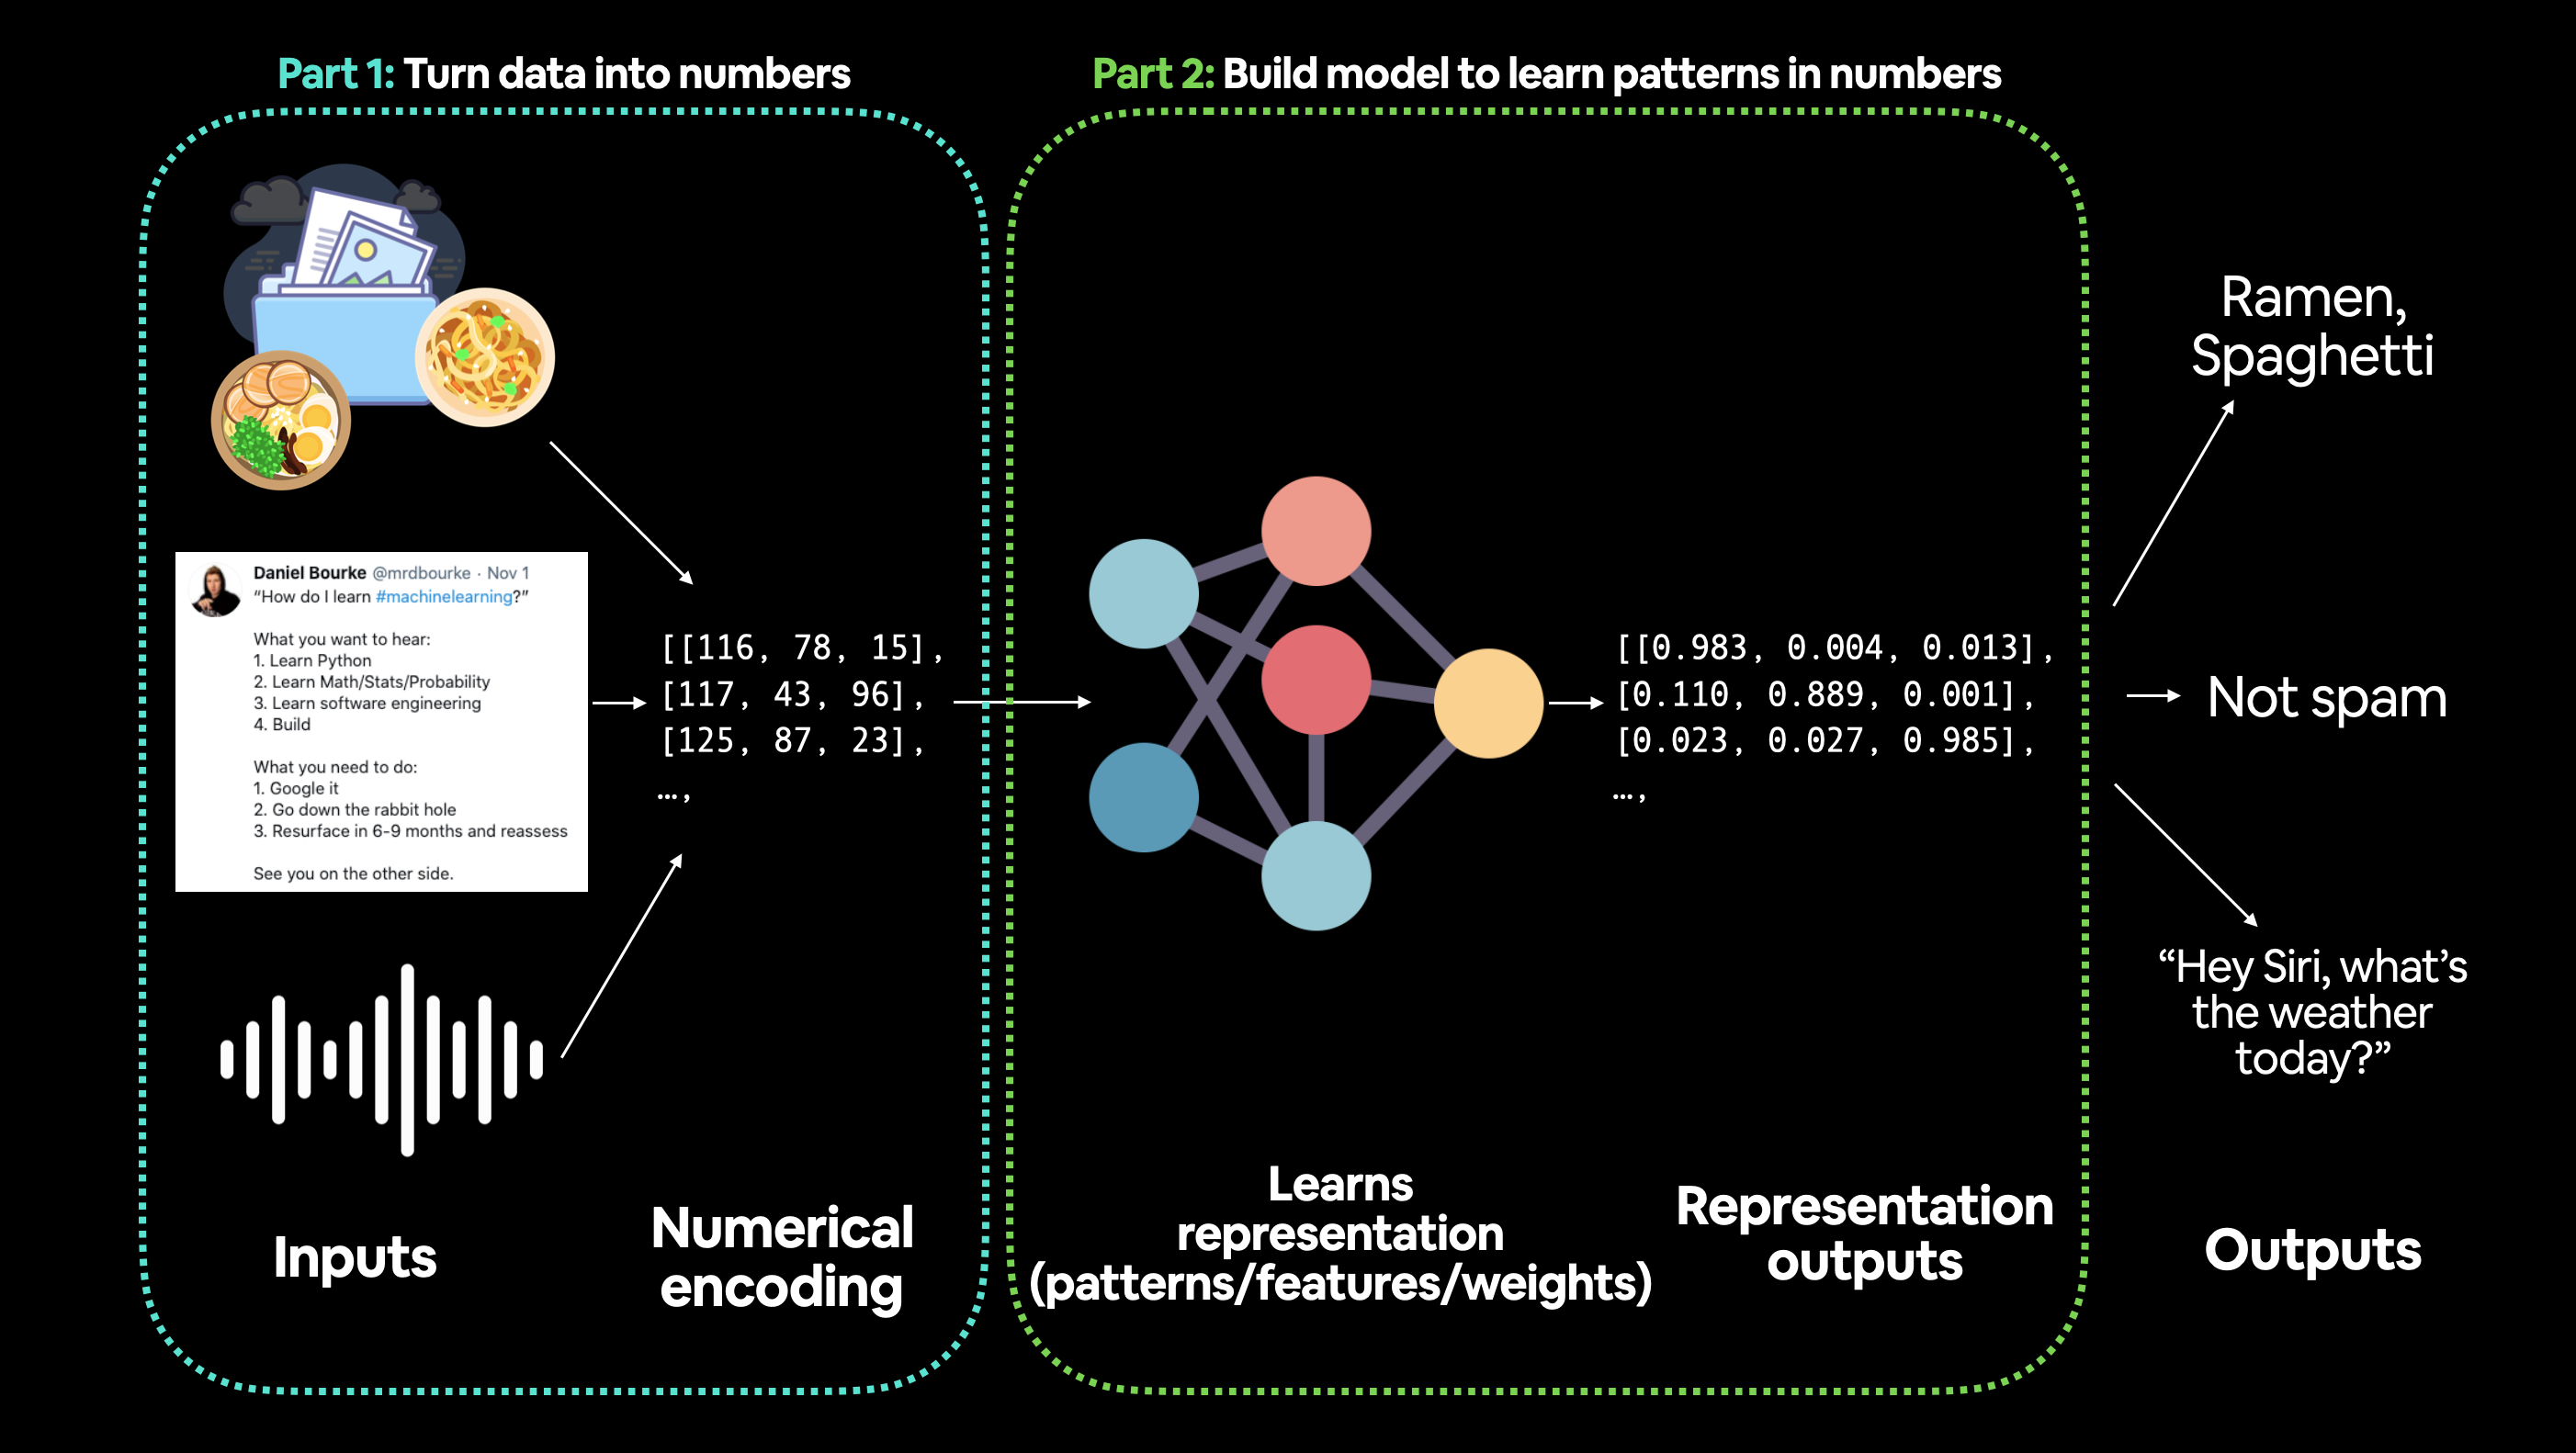
Machine learning is a game of two parts:

- Turn your data, whatever it is, into numbers (a representation).
- Pick or build a model to learn the representation as best as possible.
Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

In [3]:
# create known parameters
weight = 0.7
bias = 0.3

#create data

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

Beautiful! Now we're going to move towards building a model that can learn the relationship between `X` (features) and `y` (labels).

### Split data into training and test sets
We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:
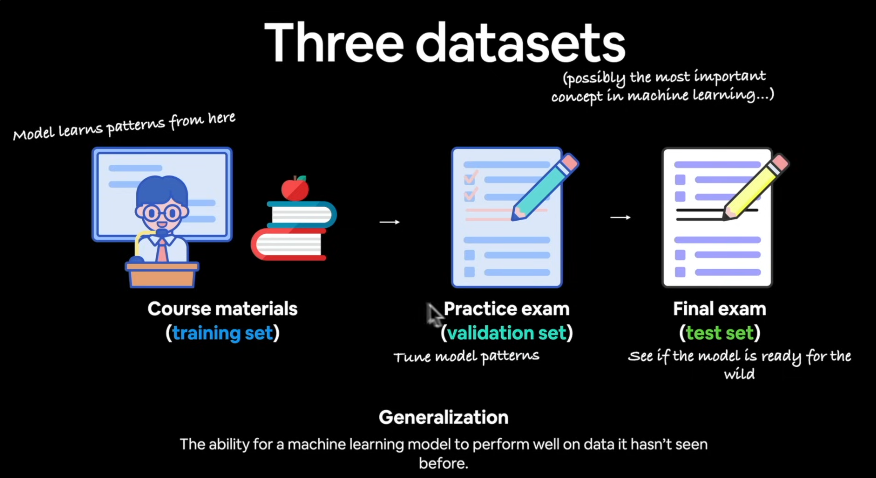

lets say you are trying to learn something through a course.
- So the training set is the material. This is where our model learns patterns from.
- Then you have a practice exam. This is where our model gets tuned on (the hyperparameters get tuned on this dataset).
- Finally, there's the final exam. This is where our model gets evaluated on completely unseen examples.


| Split           | Purpose                                                                 | Amount of total data | How often is it used?       |
|----------------|-------------------------------------------------------------------------|----------------------|-----------------------------|
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60–80%              | Always                      |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10–20%              | Often but not always        |
| **Testing set**  | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10–20%              | Always                      |


For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` tensors.

**Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn from training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [4]:
# create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

#### *EXPLANATION*

This code is doing a train/test split—a standard preprocessing step in machine learning to evaluate model performance. You divide the data into:

- Training set: for teaching the model
- Testing set: for evaluating how well the model generalizes

Assumptions
- `X` is your features (inputs to the model, e.g., images, text, tabular data).
- `y` is your labels (outputs or targets you want the model to predict).

They are usually NumPy arrays or Python lists, and both are the same length.

- `len(X)` gives the **total number of data samples**.
- `0.8 * len(X)` computes 80% of the total data.
- `int(...)` converts that floating-point result into an integer (because you can't split at a fraction of an index).
- `train_split` stores the **index position** that will act as the cutoff between training and testing data.


In [5]:
x_train, y_train = X[:train_split], y[:train_split]

`X[:train_split]` slices the first 80% of `X`, assigning it to `x_train` (training features).
`y[:train_split]` slices the first 80% of `y`, assigning it to `y_train` (training labels).

**This is your training data.**

In [6]:
x_test, y_test = X[train_split:], y[train_split:]

- `X[train_split:]` slices the **remaining 20%** of `X`, assigning it to `x_test` (testing features).
- `y[train_split:]` does the same for labels, assigning it to `y_test`.

This is **your testing data**.


In [7]:
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

This returns the sizes of each dataset to confirm the split:

`len(x_train)` should be 80% of the total samples
`len(x_test)` should be 20%

The same applies for `y_train` and `y_test`

In [8]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)


Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).

The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

In [9]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});

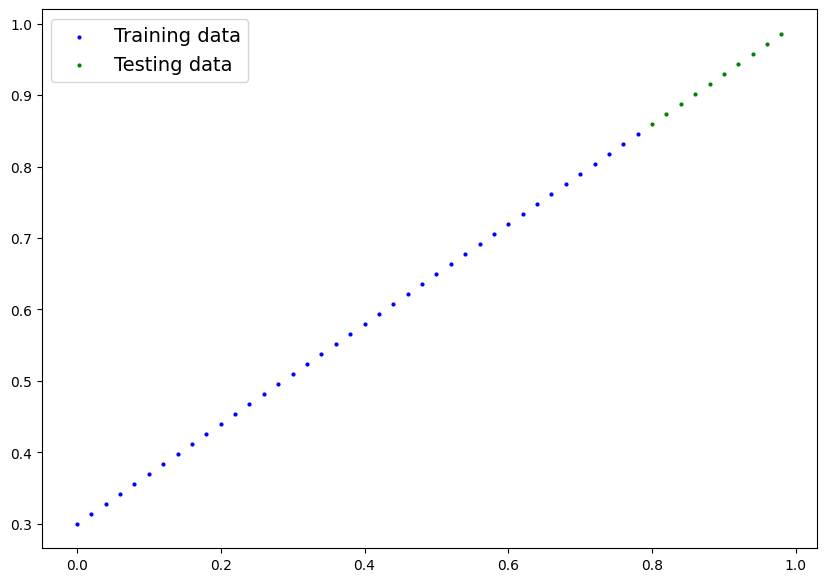

In [10]:
plot_predictions();

#### Explanation of `plot_predictions` Function

This function visualizes training data, testing data, and predicted results from a model. It's particularly useful for simple regression or classification tasks where you can plot the data points in 2D.


In [11]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    return None

- `train_data`: Feature data used to train the model (`default = X_train`)
- `train_labels`: Labels corresponding to the training data (`default = y_train`)
- `test_data`: Feature data used to test the model (`default = X_test`)
- `test_labels`: Labels for the test data (`default = y_test`)
- `predictions`: Optional predictions made by the model on the test data

**Step 1: Create the Plot Canvas**

`plt.figure(figsize=(10, 7))`

- Initializes a new figure for plotting.
- Sets the figure size to 10 inches wide by 7 inches tall.

**Step 2: Plot the Training Data**

`plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
`
- Plots training data points in blue ("`b`").
- `s=4` sets the size of each point.
- `label` is used for the legend.

**Step 3: Plot the Testing Data**

`plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")`
- Plots test data points in green ("`g`").
-Same point size and label concept.

**Step 4: Plot the Predictions (If Provided)**

`if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")`

If the model predictions are available:
Plots them in red ("`r`").
These are the model's outputs for the test data, which can then be visually compared to the actual test labels (green points).

**Step 5: Display the Legend**

`plt.legend(prop={"size": 14})`

Displays a legend to identify blue (training), green (testing), and red (predictions).
Sets the legend font size to 14 for readability.


## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.
Let's replicate a standard linear regression model using pure PyTorch.


Alright there's a fair bit going on above but let's break it down bit by bit.

**Resource**: We'll be using Python classes **to create bits and pieces for building neural networks. If you're unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.

This code defines a class that models the equation of a straight line:

`y = m * x + b`

Where:
- m is the slope (weights),
- x is the input feature,
- b is the intercept (bias),
- and y is the predicted output.

In [12]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

What our model does:
- Start with random values (weight & bias).
- Look at training data and adjust the random values to better
represent (or get closer to the underlying pattern) the data.

How does it do so?
Through 2 main algorithms:
1. Gradient decent
2. Backpropagation

#### Explanation:
1. We defined a function `LinearRegressionModel(nn.Module)`
- It inherits from `nn.Module`, which is the base class for all neural networks in PyTorch.
- Think of `nn.Module` like a template that handles parameters, layers, and the forward pass for you.

2. `def __init__(self):`
- This is the constructor method — it runs when you create an instance of the model.

3. `super().__init__()` calls the constructor of the parent class `nn.Module`. It's necessary to properly initialize the model internals.

4. `self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`
- This initializes the weight `(slope m)` of the linear model.
- `torch.randn(1)` generates a random `float` from a normal distribution (mean 0, std 1). We're starting with a random slope.
- `nn.Parameter`(...) tells PyTorch this is a learnable parameter — it should be tracked during training.
- `requires_grad=True` means that PyTorch should compute gradients for this parameter, so it can be updated during backpropagation.

5. `self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`
- This is similar to `self.weights`, but it's the bias term `(b in y = mx + b)`.
- Again, it's initialized randomly and is set as a trainable parameter.

6. `def forward(self, x: torch.Tensor) -> torch.Tensor:`
- This method defines the forward pass — the actual computation the model performs to produce output from input.
- x is the input tensor.

**The method returns:**
`self.weights * x + self.bias`

This is the linear equation `y = m * x + b.`


# PyTorch Model Building Essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are:

- `torch.nn`
- `torch.optim`
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

---

## PyTorch Modules and Their Roles

| PyTorch module         | What does it do? |
|------------------------|------------------|
| `torch.nn`             | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| `torch.nn.Parameter`   | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically. This is often referred to as "autograd". |
| `torch.nn.Module`      | The base class for all neural network modules. All the building blocks for neural networks are subclasses of this. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| `torch.optim`          | Contains various optimization algorithms. These tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss. |
| `def forward()`        | All `nn.Module` subclasses require a `forward()` method. This defines the computation that will take place on the data passed to the particular `nn.Module` (e.g., the linear regression formula above). |

---

If the above sounds complex, think of it like this: almost everything in a PyTorch neural network comes from `torch.nn`.

- `nn.Module` contains the larger building blocks (layers)
- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module`(s)
- `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data


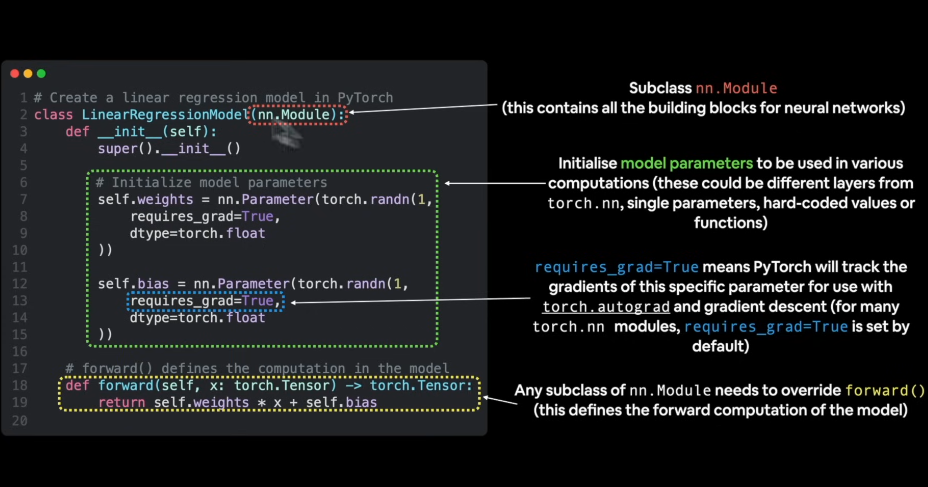

Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass nn.Module, the `forward()` method must be defined.

**Resource**: See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

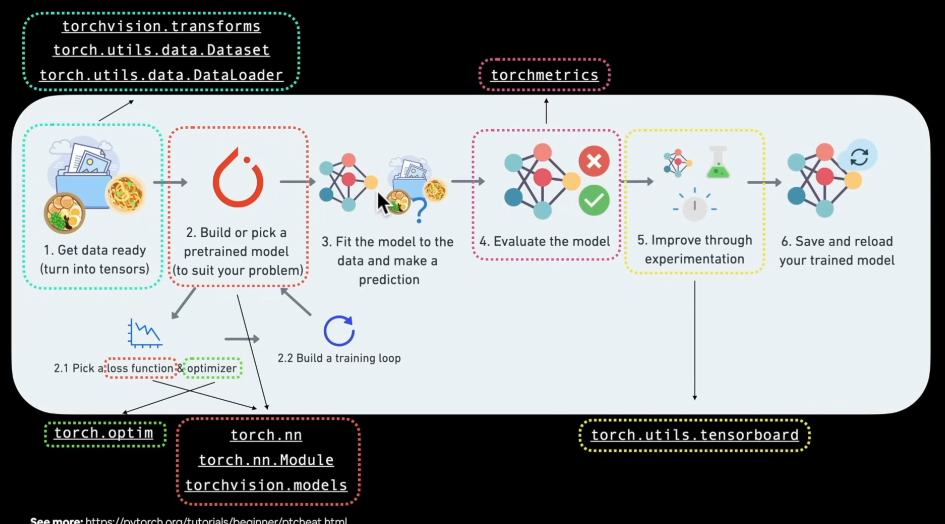

### Checking the content of our pytorch model
Now that we have created a model, lets see what's inside.
We can check our model's parameters or what's going inside our model using `.parameters()`

In [13]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using `.state_dict()`.

In [14]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Our whole goal is to write code that will allow our model to  look at these blue dots
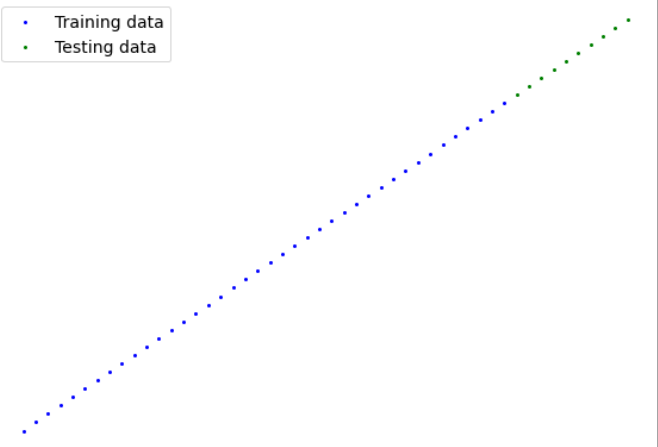
And adjust `OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])` -- this weight and bias value to be as close as possible to-

`weight = 0.7`
`bias = 0.3`

which we set in the beginning.

### Making predictions using `torch.inference_mode()`
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Let's make some predictions.

In [15]:
# lets remind ourselves what X_test and y_test is
#X_test is the test data we want our model to predict on
print(f"X_test", X_test)
# and what our model predicts its close to 
print(f"y_test", y_test)

X_test tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
y_test tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


You probably noticed we used `torch.inference_mode()` as a context manager (that's what the with `torch.inference_mode():` is) to make the predictions.

As the name suggests, `torch.inference_mode()` is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the `forward()` method) faster.

In [16]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one `X` value maps to one `y` value.

However, machine learning models are very flexible. You could have 100 `X` values mapping to one, two, three or 10 `y` values. It all depends on what you're working on.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

In [18]:
# vizualizing this

plot_predictions(predictions=y_preds)

In [19]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

An ideal model would have red dots over the green dots, because it will be predicting perfectly.
hose predictions look pretty bad...

This makes sense though, when you remember our model is just using random parameter values to make predictions.

It hasn't even looked at the blue dots to try to predict the green dots.

Time to change that.


## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to *parameters* as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.

  ### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are: 

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). | 

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another). 

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function. 

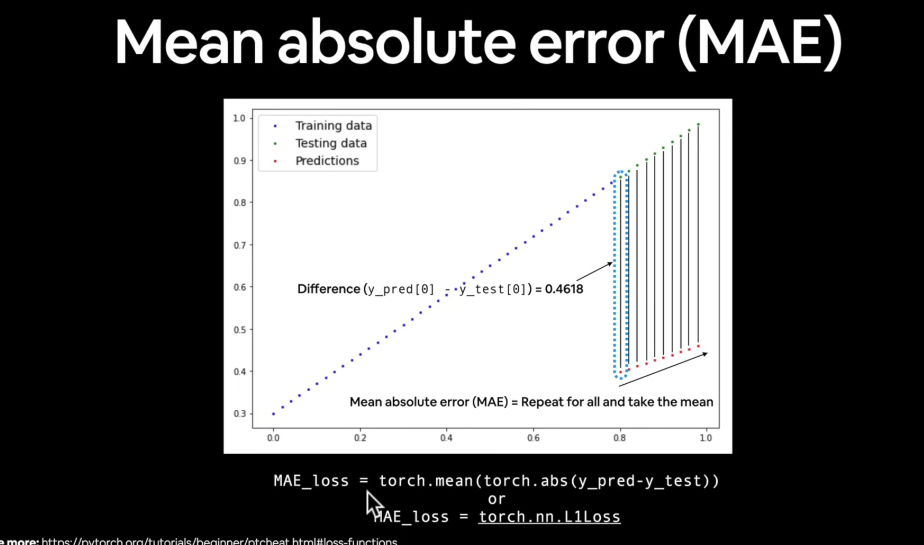
![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

* `params` is the target model parameters you'd like to optimize (e.g. the `weights` and `bias` values we randomly set before).
* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)). 

Woah, that's a lot, let's see it in code.

In [ ]:
# setting up a loss functiion
loss_fn = nn.L1Loss()

# setting up an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# the optimizer starts by randomly setting up the parameters of the model and then updates them based on the loss function and the learning rate
 # parameters of target model to optimize
#lr=0.01) learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

**Q - Which loss function and optimizer should I use?**
**A -** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't.

**For example -** for a regression problem (like ours), a loss function of `L1Loss()` (mean absolute error) and an optimizer like `torch.optim.SGD()` (stochastic gradient descent) is a good place to start.

But for a classification problem, you might want to use `CrossEntropyLoss()` as the loss function and `torch.optim.Adam()`  as the optimizer.

### Creating an optimization loop in PyTorch

Woohoo! Now we've got a loss function and an optimizer, it's now time to create a **training loop** (and **testing loop**).

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

To create these we're going to write a Python `for` loop in the theme of the [unofficial PyTorch optimization loop song](https://twitter.com/mrdbourke/status/1450977868406673410?s=20) (there's a [video version too](https://youtu.be/Nutpusq_AFw)).

![the unofficial pytorch optimization loop song](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)
*The unofficial PyTorch optimization loops song, a fun way to remember the steps in a PyTorch training (and testing) loop.*

There will be a fair bit of code but nothing we can't handle.



### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb: 
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.


### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the testing data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` | 
| 3 | Calulate evaluation metrics (optional) | Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.
